<font color='blue'> **NEW** </font> __________________ elevslope.dbf __________________ PlusFlow.dbf __________________ PlusFlowlineVAA.dbf

In [ ]:
import flopy;import matplotlib.pyplot as plt;import numpy as np;from flopy.discretization import StructuredGrid;import os;from typing import List, Tuple, Union;from pathlib import Path;
import pandas as pd;from flopy.utils.gridintersect import GridIntersect;from shapely.geometry import LineString, Polygon;import warnings;warnings.filterwarnings("ignore", category=DeprecationWarning); 
import earthpy.spatial as es;import geopandas as gpd;import rioxarray as rxr;import rasterio as rio; from rasterio.plot import plotting_extent ;import earthpy.plot as ep ; from pandas import * 
import gisutils ; from shapely.geometry import MultiPoint ,Point    
R1 = Path('E:/15_REPOS/02_Beta-Me/data/Tacho_02')  ;R2   =                         (R1/'a00_Tacho_raster.tif')  ;SHP1=os.path.join(R1/'06_bacia_vetor.shp')   ; VEC1 = gpd.read_file(SHP1)
TA = Path("./TA") ;TA.mkdir(exist_ok=True)         ;TOPO = flopy.utils.Raster.load (R1/'a00_Tacho_raster.tif')                                          ; OV1 = VEC1.to_crs(es.crs_check(R2))
CRS = gisutils.get_shapefile_crs(SHP1) ; print(CRS)
R4=Path('E:/15_REPOS/c01_EarthPy__Tacho/Tacho_03/n')      ;SHP2=os.path.join(R4/'simple04_300m_II_.shp')   ; VEC2 = gpd.read_file(SHP2) ; OV2 = VEC2.to_crs(es.crs_check(R2))

EPSG:32723


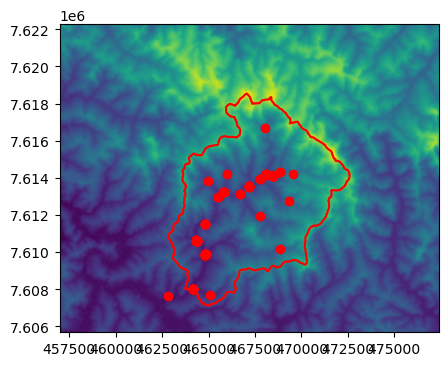

,fid,cat,value,label,geometry
43,371.0,371,133,None,"LINESTRING (464145.556 7608011.47, 464145.556 ..."
44,372.0,372,133,None,"LINESTRING (464157.558 7608011.47, 464145.556 ..."
45,374.0,374,133,None,"LINESTRING (464145.556 7607999.472, 464145.556..."
46,418.0,418,109,None,"LINESTRING (465057.697 7607687.513, 464157.558..."
47,442.0,442,142,None,"LINESTRING (462813.35 7607627.521, 464145.556 ..."


In [4]:
fig = plt.figure(figsize=(12,4)) 
ax = fig.add_subplot(122)  ; TOPO.plot(ax=ax) ; OV1.boundary.plot(ax=ax, color='red') ; OV2.boundary.plot(ax=ax, color='red')  ; plt.show(block=False)    ; VEC2.tail()

In [ ]:
LNS1 = sfrmaker.Lines.from_nhdplus_v2(NHDPlus_paths=TA, bbox_filter=BOX)

In [ ]:
stream_lines = sfrmaker.Lines.from_shapefile(shapefile=os.path.join(shp_pth, 'orbacken_sfr.shp'),
                                             id_column='id',
                                             routing_column='toid',
                                             width1_column='width1',
                                             width2_column='width2',
                                             up_elevation_column='elev_up',
                                             dn_elevation_column='elev_dn',
                                             attr_length_units='meters',
                                             attr_height_units='meters',
                                             )

In [ ]:
VV=VEC1.copy() ;VV.geometry=VV.geometry.apply(lambda x: MultiPoint(list(x.exterior.coords))) ;GDF=gpd.GeoDataFrame(VV,crs=CRS) ;EXP=GDF.explode(index_parts=False) ;print(len(EXP));EXP.head(2)

In [ ]:
# ax = fig.add_subplot(121)  ;DF0.plot(x='xcoord',y='ycoord',ax=ax,legend=False)  ;DF1.plot(ax=ax,x='xcoord',y='ycoord',legend=False)  ;DF2.plot(ax=ax,x='xcoord',y='ycoord',legend=False)  
#   ;DF3.plot(ax=ax,x='xcoord',y='ycoord',legend=False)
XA=ExcelFile(os.path.join(R1/'poly.xlsx'))                ; DF0=XA.parse(XA.sheet_names[0])   ; DF0['ab'] = DF0['xcoord'].astype(str)+' '+DF0['ycoord'].astype(str) 
XA=ExcelFile(os.path.join(R1/'str1.xlsx'))                ; DF1=XA.parse(XA.sheet_names[0])   ; DF1['ab'] = DF1['xcoord'].astype(str)+' '+DF1['ycoord'].astype(str) 
XA=ExcelFile(os.path.join(R1/'str2.xlsx'))                ; DF2=XA.parse(XA.sheet_names[0])   ; DF2['ab'] = DF2['xcoord'].astype(str)+' '+DF2['ycoord'].astype(str) 
XA=ExcelFile(os.path.join(R1/'str3.xlsx'))                ; DF3=XA.parse(XA.sheet_names[0])   ; DF3['ab'] = DF3['xcoord'].astype(str)+' '+DF3['ycoord'].astype(str) 
DF1 = DF1.loc[:,['xcoord','ycoord']];  DF1['order']=DF1.index+1 ;DF1['id']=1                  ; DF2 = DF2.loc[:,['xcoord','ycoord']];  DF2['order']=DF2.index+1 ;DF2['id']=2 
DF3 = DF3.loc[:,['xcoord','ycoord']];  DF3['order']=DF3.index+1 ;DF3['id']=3                  ; df = pd.concat([DF1,DF2, DF3], ignore_index=True)
geometry = [Point(xy) for xy in zip(df['xcoord'], df['ycoord'])]                              ; gdf = gpd.GeoDataFrame(df, geometry=geometry)
EXT = gdf.sort_values(by=['id', 'order']).groupby('id')['geometry'].apply(lambda x: LineString(x.tolist()))    ; EXT = gpd.GeoDataFrame(EXT, geometry='geometry') ; EXT

In [ ]:
%%capture
LNS2 = sfrmaker.Lines.from_nhdplus_v2(NHDFlowlines=os.path.join(R5/'NHDFlowline.shp')  , PlusFlowlineVAA=os.path.join(R3/'PlusFlowlineVAA.dbf'),
                                      PlusFlow    =os.path.join(R3/'PlusFlow.dbf')     , elevslope= os.path.join(R3/'elevslope.dbf')        ,bbox_filter=(-90.625, 46.3788, -90.4634, 46.4586))
                                      


In [ ]:
XA=ExcelFile(os.path.join(R1/'str2.xlsx'))    ; DF2=XA.parse(XA.sheet_names[0])   ; DF2['ab'] = DF2['xcoord'].astype(str)+' '+DF2['ycoord'].astype(str) ; # DF2